# Advanced Data Analysis - week 2 extra exercises

In the advanced data analysis course, we assume basic knowledge of Python, as could be acquired by attending the *Introduction to Programming* bridging course.

This notebook includes exercises for autonomous study in **Week 2**.



Let's start by import Pandas, matplotlib and os libraries.

In [3]:
# imports pandas
import pandas as pd

# imports matplotlib
import matplotlib.pyplot as plt

import os
plt.rcParams['figure.figsize'] = [13, 6] # This line of code changes the default value for height and width of images

# Extra Exercises

## Data

In **crypto_data** folder, we have historical price information of some of the top crypto currencies by market capitalization.

Each file refers to one cryptocurrency (e.g., Bitcoin, Binance). Price history is available on a daily basis from April 28, 2013 until 2021. The structure of the datasets are the following:

- Date : date of observation
- Open : Opening price on the given day
- High : Highest price on the given day
- Low : Lowest price on the given day
- Close : Closing price on the given day
- Volume : Volume of transactions on the given day
- Market Cap : Market capitalization in USD

### 1 - Start by reading the data of bitcoin

In [4]:
#TODO
fileName = os.path.join("data", "crypto_data", "coin_Bitcoin.csv")
bitcoinDF = pd.read_csv(fileName)
print(bitcoinDF.head())

   SNo     Name Symbol                 Date        High         Low  \
0    1  Bitcoin    BTC  2013-04-29 23:59:59  147.488007  134.000000   
1    2  Bitcoin    BTC  2013-04-30 23:59:59  146.929993  134.050003   
2    3  Bitcoin    BTC  2013-05-01 23:59:59  139.889999  107.720001   
3    4  Bitcoin    BTC  2013-05-02 23:59:59  125.599998   92.281898   
4    5  Bitcoin    BTC  2013-05-03 23:59:59  108.127998   79.099998   

         Open       Close  Volume     Marketcap  
0  134.444000  144.539993     0.0  1.603769e+09  
1  144.000000  139.000000     0.0  1.542813e+09  
2  139.000000  116.989998     0.0  1.298955e+09  
3  116.379997  105.209999     0.0  1.168517e+09  
4  106.250000   97.750000     0.0  1.085995e+09  


# Extra Exercises

### Calculate Simple Moving Average with k = 10, 20, 30 and create a column for each one

In [5]:
#TODO
bitcoinDF["simpleMA_k=10"] = bitcoinDF["Close"].rolling(10, center = False).mean()
bitcoinDF["simpleMA_k=20"] = bitcoinDF["Close"].rolling(20, center = False).mean()
bitcoinDF["simpleMA_k=30"] = bitcoinDF["Close"].rolling(30, center = False).mean()

### Display the Close price along with the previous moving averages (since 2021).  

In [6]:
#TODO
bitcoinDF["Date"] = pd.to_datetime(bitcoinDF["Date"], format = "%Y-%m-%d")
bitcoinDF_2021 = bitcoinDF[bitcoinDF["Date"].dt.strftime("%Y") == "2021"]
print(bitcoinDF_2021[["Close", "simpleMA_k=10", "simpleMA_k=20", "simpleMA_k=30"]])

             Close  simpleMA_k=10  simpleMA_k=20  simpleMA_k=30
2804  29374.151889   26601.548652   24250.427334   22428.243559
2805  32127.267939   27490.140959   24899.671604   22850.972541
2806  32782.024466   28394.748433   25576.440611   23320.381169
2807  31971.913522   29125.460758   26204.182485   23747.637249
2808  33992.429344   29880.999941   26838.274046   24235.880862
...            ...            ...            ...            ...
2986  33897.048590   33967.128373   35353.911146   35618.790261
2987  34668.548402   34061.680315   35132.445521   35467.449674
2988  35287.779766   34124.214702   34885.910617   35413.895489
2989  33746.002456   34335.036942   34552.897290   35353.696946
2990  34235.193451   34539.928520   34347.303801   35299.457471

[187 rows x 4 columns]


What is the major difference between the Close time-series when compared with  time-series of the moving averages?
What happens as k increases?

In [43]:
#TODO

### Display the Close price along with the simple moving average, centered moving average, weighted moving average and the exponential moving average (since 2021)

Use, for example:
 - k = 10
 - Weights = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
 - alpha = 0.2

In [10]:
#TODO
k = 10
weights = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
alpha = 0.2

bitcoinDF["centeredMA_k=10"] = bitcoinDF["Close"].rolling(k, center = True).mean()
bitcoinDF["weightedMA_k=10"] = bitcoinDF["Close"].rolling(k).apply(lambda x: sum(x * weights)/sum(weights))
bitcoinDF["expMA_k=10"] = bitcoinDF["Close"].ewm(com = alpha).mean()

print(bitcoinDF_2021[["Close", "simpleMA_k=10", "centeredMA_k=10", "weightedMA_k=10", "expMA_k=10"]])

             Close  simpleMA_k=10  centeredMA_k=10  weightedMA_k=10  \
2804  29374.151889   26601.548652     29880.999941     27660.868471   
2805  32127.267939   27490.140959     30936.206925     28665.544705   
2806  32782.024466   28394.748433     32164.830372     29627.705342   
2807  31971.913522   29125.460758     33508.347788     30278.098995   
2808  33992.429344   29880.999941     34649.707096     31163.002374   
...            ...            ...              ...              ...   
2986  33897.048590   33967.128373     34539.928520     34165.114061   
2987  34668.548402   34061.680315              NaN     34292.644975   
2988  35287.779766   34124.214702              NaN     34515.572148   
2989  33746.002456   34335.036942              NaN     34446.806285   
2990  34235.193451   34539.928520              NaN     34428.652923   

        expMA_k=10  
2804  29300.447054  
2805  31656.131125  
2806  32594.375576  
2807  32075.657197  
2808  33672.967319  
...            ...  


Compare the different moving averages?

### Is there any correlation of the bitcoin price in 2021 with any other coin?

In [58]:
#TODO
# defining the path for each csv file and initializing the dataframe including all .csv files
path = "data/crypto_data"
all_files = os.listdir(path)
df_complete = pd.DataFrame()

# append all files together
for file in all_files:
    df_temp = pd.read_csv(path + "/" + file)
    df_complete = pd.concat([df_complete, df_temp])

# filtering the files s.t. we only look at data from 2021
df_complete["Date"] = pd.to_datetime(df_complete["Date"], format = "%Y-%m-%d")
df_complete_2021 = df_complete[df_complete["Date"].dt.strftime("%Y") == "2021"]

# finding the correlation between bitcoin closing prices and other coins' closing prices
coins = df_complete_2021["Name"].unique()
bitcoin_close = pd.DataFrame(df_complete_2021["Close"].loc[df_complete_2021["Name"] == "Bitcoin"].reset_index(drop = True))

for coin in coins:
    aux = pd.DataFrame(df_complete_2021["Close"].loc[df_complete_2021["Name"] == coin].reset_index(drop = True))
    correlation = bitcoin_close.corrwith(aux["Close"])
    print("Correlation between bitcoin and", coin, ":", str(correlation["Close"]))
    if abs(correlation["Close"]) < 0.2:
        print("\t--> very weakly correlated")
    elif abs(correlation["Close"]) < 0.4:
        print("\t--> weakly correlated")
    elif abs(correlation["Close"]) < 0.6:
        print("\t--> moderately correlated")
    elif abs(correlation["Close"]) < 0.8:
        print("\t--> strongly correlated")
    else:
        print("\t--> very strongly correlated")

Correlation between bitcoin and NEM : 0.6935002492871487
	--> strongly correlated
Correlation between bitcoin and EOS : 0.47221294368710365
	--> moderately correlated
Correlation between bitcoin and Monero : 0.5745806527504186
	--> moderately correlated
Correlation between bitcoin and Polkadot : 0.9008111928499352
	--> very strongly correlated
Correlation between bitcoin and USD Coin : 0.2221870704686633
	--> weakly correlated
Correlation between bitcoin and Uniswap : 0.7615965691038196
	--> strongly correlated
Correlation between bitcoin and Binance Coin : 0.5434800869127475
	--> moderately correlated
Correlation between bitcoin and IOTA : 0.8212941978541057
	--> very strongly correlated
Correlation between bitcoin and Aave : 0.6074978217827802
	--> strongly correlated
Correlation between bitcoin and Solana : 0.1588271584444227
	--> very weakly correlated
Correlation between bitcoin and Bitcoin : 0.9999999999999998
	--> very strongly correlated
Correlation between bitcoin and Cardano 

### Research existing proposal for moving averages and similar statistics info. Implement a python function that calculates a proposal of your choice and apply it to a coin of your choice

Some pointers:
* [https://en.wikipedia.org/wiki/Moving_average](https://en.wikipedia.org/wiki/Moving_average)
* [https://www.google.com/search?q=bollinger+bands](https://www.google.com/search?q=bollinger+bands)

### Indicators from moving average

There are some proposals that say an asset is in an uptrend (resp. downtrend) when the moving average is increasing (resp. decreseasing).
Compute whether a coin is uptrend, daoentrend or neutral.

Suggestion: consider using rolling.



-------------- NEM --------------
0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
883    0.285595
884    0.290223
885    0.294398
886    0.294672
887    0.296455
Name: moving_avg, Length: 37082, dtype: float64

-------------- EOS --------------
0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
883    2.668550
884    2.666471
885    2.686312
886    2.703128
887    2.713408
Name: moving_avg, Length: 37082, dtype: float64

-------------- Monero --------------
0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
883    6.610308
884    6.570373
885    6.519611
886    6.472229
887    6.451929
Name: moving_avg, Length: 37082, dtype: float64

-------------- Polkadot --------------
0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
883   NaN
884   NaN
885   NaN
886   NaN
887   NaN
Name: moving_avg, Length: 37082, dtype: float64

-------------- USD Co

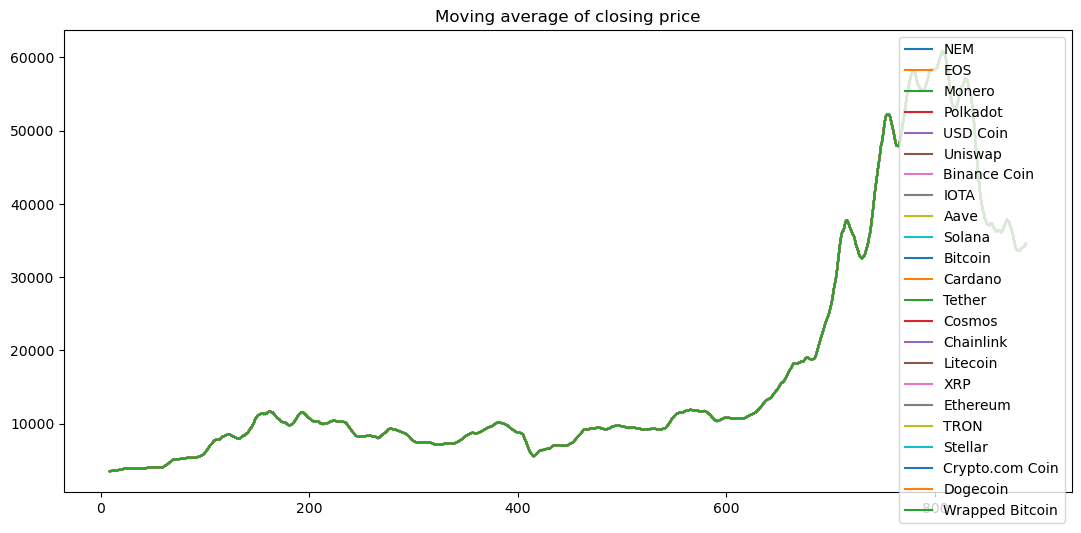

In [66]:
k = 10
for coin in coins:
    print()
    print("--------------", coin, "--------------")
    df_complete["moving_avg"] = df_complete.loc[df_complete["Name"] == coin]["Close"].rolling(k, center = False).mean()
    print(df_complete["moving_avg"])
    moving_avg.plot(kind = "line", title = "Moving average of closing price", x = df_complete["Date"], y = df_complete["moving_avg"])

plt.legend(coins)
plt.show()
    
    
    